In [137]:
import numpy
# scipy.special for the sigmoid function expit(), and its inverse logit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

import keras
from keras.datasets import mnist
# Comment filled in
(train_future, train_label), (test_future, test_label) = mnist.load_data()
train_future = train_future[:10000]
train_label = train_label[:10000]

In [138]:
# How many pieces of image data do you have learning data?
print(len(train_future))

# How many correct labels do you have for learning data?
print(len(train_label))

# How many image data of verification data are there?
print(len(test_future))

# How many correct labels do the validation data have?
print(len(test_label))

# Let's look at the first image data of the learning data
print(train_future[0])

#Let's look at the first correct answer label of the learning data
print(train_label[0])

# If you have time, let's look at other data

10000
10000
10000
10000
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

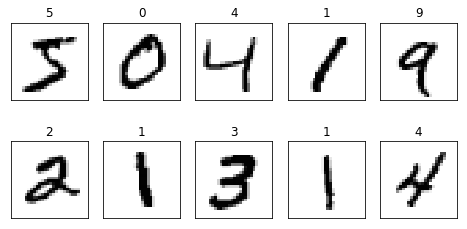

In [139]:
# Looking at the image for reference, it looks like this
import numpy
import matplotlib.pyplot as plt

# Visualize the first 10 images
images=train_future[0:10]
labels=train_label[0:10]

fig=plt.figure(figsize=(8,4))
subplot=None
for c,(image,label) in enumerate(zip(images,labels)):
    subplot=fig.add_subplot(2,5,c+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % (label))
    subplot.imshow(image.reshape(28,28),vmin=0,vmax=255,
                  cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()

In [141]:
train_future_data = train_future.astype('float32')
# 
test_future_data = test_future.astype('float32')
# 

train_future_data = train_future_data / 255
# 
test_future_data = test_future_data / 255
# 


train_future_data = train_future_data.reshape(10000, 784)
# 

test_future_data = test_future_data.reshape(10000, 784)
# 

# Confirm number of array
print("Number of array of downloaded image data")
print(train_future.shape)
print("Number of array of processed image data")
print(train_future_data.shape)
print("First piece of learning data")
print(train_future_data[0])

# Convert to one hot vector format
train_label_data = keras.utils.to_categorical(train_label, 10)
test_label_data = keras.utils.to_categorical(test_label, 10)

print("State of the first label of learning data")
print(train_label_data[0])


Number of array of downloaded image data
(10000, 28, 28)
Number of array of processed image data
(10000, 784)
First piece of learning data
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0

In [142]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    
    # backquery the neural network
    # we'll use the same termnimology to each item, 
    # eg target are the values at the right of the network, albeit used as input
    # eg hidden_output is the signal to the right of the middle nodes
    def backquery(self, targets_list):
        # transpose the targets list to a vertical array
        final_outputs = numpy.array(targets_list, ndmin=2).T
        
        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs -= numpy.min(hidden_outputs)
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # calculate the signal out of the input layer
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs

In [143]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [144]:
training_data_list = train_future

In [ ]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 1

for e in range(epochs):
    # go through all records in the training data set
    print("Epoch:", e)
    for record in training_data_list:
        inputs = train_future_data
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

Epoch: 0


In [104]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [107]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

In [108]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.2


[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


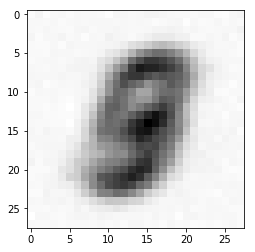

In [110]:
# run the network backwards, given a label, see what image it produces

# label to test
label = 0
# create the output signals for this label
targets = numpy.zeros(output_nodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99
print(targets)

# get image data
image_data = n.backquery(targets)

# plot image data
matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')

In [134]:
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>
</td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
</td>
</table>
"""

javascript="""
<script type="text/Javascript">
	var pixels = [];
	for(var i = 0; i < 28*28; i++) pixels[i] = 0
	var click=0;
	var button_state=0;
    
	var canvas = document.querySelector("canvas");
    
    canvas.addEventListener("mousedown", function(e){
        button_state=1;
    });
    canvas.addEventListener("mouseup", function(e){
        button_state=0;
    });
    canvas.addEventListener("mouseleave", function(e){
        button_state=0;
    });
	
	canvas.addEventListener("mousemove", function(e){
		console.log(button_state);
        if(button_state){
            click = 1;
			canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
			canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
			x = Math.floor(e.offsetY * 0.2)
			y = Math.floor(e.offsetX * 0.2) + 1
            console.log(x)
            
			for(var dy = 0; dy < 2; dy++){
				for(var dx = 0; dx < 2; dx++){
					if((x + dx < 28) && (y + dy < 28)){
						pixels[(y+dy) + (x+dx)*28] = 1
					}
				}
			}
		}else{
            if(click == 1) set_value()
			click = 0;
		}
	});
	
	function set_value(){
		var result = ""
		for(var i=0;i<28*28;i++) result += pixels[i] + ","
		var kernel = IPython.notebook.kernel;
		kernel.execute("image = [" + result + "]");
	}
	
	function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
		canvas.getContext("2d").fillRect(0,0,140,140);
		for(var i=0;i<28*28;i++) pixels[i]=0
	}
</script>
"""

from IPython.display import HTML
HTML(input_form + javascript)

In [135]:
print(len(image))

784


[[2.38855631e-213]
 [4.19369931e-133]
 [8.92996288e-177]
 [3.97513074e-111]
 [1.06511625e-136]
 [5.07468604e-072]
 [2.29069488e-183]
 [1.14602456e-189]
 [1.03142826e-263]
 [1.00000000e+000]]
network says  9


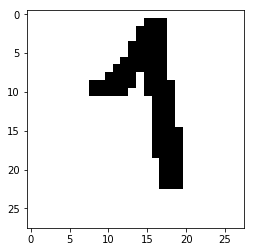

In [136]:
# test the neural network withour own images
img_data = numpy.array(image)
img_data = img_data.reshape(1,784)
matplotlib.pyplot.imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')

# query the network
outputs = n.query(img_data)
print (outputs)

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print("network says ", label)
